# Analisando Vendas de Motocicletas em 2023

## Extraindo Dados 

In [3]:
# Instalando as Bibliotecas 

!pip install requests
!pip install beautifulsoup4
!pip install html5lib

In [4]:
# Importando as Bibliotecas 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests 
from bs4 import BeautifulSoup

In [5]:
# Enviando Requisição para o site 

res = requests.get('https://www.motoo.com.br/emplacamentos/motos-mais-vendidas/2023/')

# Verificando se a requisição foi bem sucedida

if res.status_code == 200:
    print("A requisição foi bem-sucedida!")

A requisição foi bem-sucedida!


In [6]:
# Realizando o Parser

soup = BeautifulSoup(res.content, 'html.parser')

In [7]:
# Encontrando os Dados 

table = soup.find('table')

# Extraindo os cabeçalhos das colunas
headers = []
for th in table.find_all('th'):
    headers.append(th.text.strip())

# Extraindo os dados das células
data = []
for row in table.find_all('tr'):
    row_data = []
    for td in row.find_all('td'):
        row_data.append(td.text.strip())
    if row_data:
        data.append(row_data)

# Criando o DataFrame
df = pd.DataFrame(data, columns=headers)

## Análise Exploratória 

In [8]:
# Verificando Dataset

df.head()

,Pos.,Veículo,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,1º,Honda CG 160,30.386,27.109,39.754,33.689,43.444,36.194,29.862,36.843,34.991,34.097,35.611,36.802,418.782
1,2º,Honda NXR 160 Bros,10.104,9.474,14.103,11.443,15.455,13.492,11.588,14.119,12.261,12.619,12.398,12.664,149.720
2,3º,Honda Pop 110i,8.771,8.255,12.620,10.280,16.035,13.744,12.172,13.783,13.280,13.287,13.390,13.928,149.545
3,4º,Honda Biz 125,8.836,8.922,13.021,10.284,12.931,11.310,8.299,12.994,13.707,14.947,14.459,14.670,144.380
4,5º,Honda Biz 110i,4.961,4.409,6.509,5.086,5.378,7.308,5.452,5.849,6.382,6.603,6.758,7.561,72.256


In [7]:
# Dimensão do Dataset

df.shape

(236, 15)

In [8]:
# Verificando as Colunas 

df.columns

Index(['Pos.', 'Veículo', 'Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul',
       'Ago', 'Set', 'Out', 'Nov', 'Dez', 'Total'],
      dtype='object')

In [9]:
# Informações do Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pos.     236 non-null    object
 1   Veículo  236 non-null    object
 2   Jan      236 non-null    object
 3   Fev      236 non-null    object
 4   Mar      236 non-null    object
 5   Abr      236 non-null    object
 6   Mai      236 non-null    object
 7   Jun      236 non-null    object
 8   Jul      236 non-null    object
 9   Ago      236 non-null    object
 10  Set      236 non-null    object
 11  Out      236 non-null    object
 12  Nov      236 non-null    object
 13  Dez      236 non-null    object
 14  Total    236 non-null    object
dtypes: object(15)
memory usage: 27.8+ KB


In [10]:
# Verificando se há Valores Nulos 

df.isnull().sum()

Pos.       0
Veículo    0
Jan        0
Fev        0
Mar        0
Abr        0
Mai        0
Jun        0
Jul        0
Ago        0
Set        0
Out        0
Nov        0
Dez        0
Total      0
dtype: int64

## Perguntas de Negócio

###### 1_ No Preimeiro Semestre qual foi o mês que teve o maior número de vendas?

In [11]:
# Filtrando os Dados do Primeiro Semestre

vendas_primeiro_sem = df.loc[:, 'Jan':'Jun']

# Calculando o total de vendas no primeiro semestre 

total_vendas_primeiro_sem = vendas_primeiro_sem.sum()

# Encontrando o valor máximo de vendas no Primeiro Semestre

max_vendas = total_vendas_primeiro_sem.max()

# Encontrando o mês com o maior número de vendas no Primeiro Semestre

mes_maior_vendas = total_vendas_primeiro_sem[total_vendas_primeiro_sem == max_vendas].index[0]

print("O mês com o maior número de vendas no Primeiro Semestre é:", mes_maior_vendas)

O mês com o maior número de vendas no Primeiro Semestre é: Mai


###### 2_ No Primeiro Semestre qual foi o mês que teve o menor número de vendas?

In [12]:
# Filtrando os Dados do Primeiro Semestre 

vendas_primeiro_sem = df.loc[:,'Jan':'Jun']

# Calculando o total de vendas no Primeiro Semestre

total_vendas_primeiro_sem = vendas_primeiro_sem.sum()

# Encontrando o valor mínimo de vendas no Primeiro Semestre 

min_vendas = total_vendas_primeiro_sem.min()

# Encontrando o Mês com o menor número de vendas no Primeiro Semestre 

mes_menor_vendas = total_vendas_primeiro_sem [total_vendas_primeiro_sem == min_vendas].index[0]

print('O Mês com o menor número de vendas no Primeiro Semestre é:',mes_menor_vendas)

O Mês com o menor número de vendas no Primeiro Semestre é: Fev


###### 3_ No segundo semestre qual mês teve o maior número de vendas?

In [13]:
# Filtrando os meses do Segundo Semestre

vendas_segundo_sem = df.loc[:, 'Jul': 'Dez']

# Calculando o Total de Vendas no Segundo Semestre

total_vendas_segundo_sem = vendas_segundo_sem.sum()

# Encontrando o valor máximo no Segundo Semestre

max_vendas = total_vendas_segundo_sem.max()

# Identificando o mês com o maior número de vendas

mes_maior_vendas = total_vendas_segundo_sem[total_vendas_segundo_sem == max_vendas].index[0]

print('O mês com o maior número de vendas no Segundo Semestre é:', mes_maior_vendas)

O mês com o maior número de vendas no Segundo Semestre é: Ago


###### 4_ No segundo semestre qual mês teve o menor número de vendas? 

In [14]:
# Filtrando os meses do Segundo Semestre

vendas_segundo_sem = df.loc[:, 'Jul': 'Dez']

# Calculando o Total de Vendas no Segundo Semestre

total_vendas_segundo_sem = vendas_segundo_sem.sum()

# Encontrando o valor máximo no Segundo Semestre

min_vendas = total_vendas_segundo_sem.min()

# Identificando o mês com o maior número de vendas

mes_menor_vendas = total_vendas_segundo_sem[total_vendas_segundo_sem == min_vendas].index[0]

print('O mês com o maior número de vendas no Segundo Semestre é:', mes_menor_vendas)

O mês com o maior número de vendas no Segundo Semestre é: Jul


###### 5_ Identifique qual foi o mês de maior e menor desempenho em vendas durante o ano?

In [15]:
# Filtrando os Dados 

vendas_ano = df.loc[:, 'Jan': 'Dez']

# Calculando o total de vendas 

total_vendas_ano = vendas_ano.sum()

# Encontrando o valor máximo

max_maior_vendas = total_vendas_ano.max()

# Identificanddo o mês com o valor máximo

mes_maior_vendas = total_vendas_ano[total_vendas_ano == max_maior_vendas].index[0]

# Encotrando o valor mínimo 

min_menor_vendas = total_vendas_ano.min()

# Identificando o mês com o valor mínimo 

mes_menor_vendas = total_vendas_ano[total_vendas_ano == min_menor_vendas].index[0]

print('1_ O Mês com o maior número de vendas durante o ano é', mes_maior_vendas)
print('2_ O Mês com o menor número de vendas durante o ano é', mes_menor_vendas)

1_ O Mês com o maior número de vendas durante o ano é Mai
2_ O Mês com o menor número de vendas durante o ano é Fev


###### 6_ Quais foram as 10 motos mais vendidas durante o ano?

In [36]:
total_vendas = df.loc[:, 'Jan':'Dez'].sum(axis=1)

# Filtrando os Dados dos Veículos

posicao_veiculo = df[['Veículo','Pos.']]

# Identificando os dez mais vendidos

dez_mais_vendidos = veiculos_vendidos.head(10)

print(dez_mais_vendidos)

                 Veículo Pos.  Total Vendas
0           Honda CG 160   1º       418.782
1     Honda NXR 160 Bros   2º       149.720
2         Honda Pop 110i   3º       149.545
3          Honda Biz 125   4º       144.380
4         Honda Biz 110i   5º        72.256
5  Honda CB 300F Twister   6º        77.917
6      Yamaha Factor 150   7º        43.415
7          Yamaha Lander   8º        41.617
8      Yamaha Fazer FZ25   9º        41.078
9          Honda PCX 160  10º        38.760


In [32]:
print('As Dez motos mais vendidas foram:')
print('1º Honda CG 160')
print('2º Honda NXR 160 Bros')
print('3º Honda Pop 110i')
print('4º Honda Biz 125')
print('5º Honda Biz 110i')
print('6º Honda CB 300F Twister')
print('7º Yamaha Factor 150')
print('8º Yamaha Lander')
print('9º Yamaha Fazer FZ25')
print('10º Honda PCX 160')

As Dez motos mais vendidas foram:
1º Honda CG 160
2º Honda NXR 160 Bros
3º Honda Pop 110i
4º Honda Biz 125
5º Honda Biz 110i
6º Honda CB 300F Twister
7º Yamaha Factor 150
8º Yamaha Lander
9º Yamaha Fazer FZ25
10º Honda PCX 160


###### 7_ Quais foram as 10 motos menos vendidas durante o ano?

In [37]:
# Filtrando os Dados de Vendas 

total_vendas = df.loc[:, 'Jan':'Dez'].sum(axis=1)

# Filtrando os Dados dos Veículos

posicao_veiculo = df[['Veículo', 'Pos.']]

# Identificando os Dez Menos Vendidos

veiculos_vendidos = veiculos_vendidos.sort_values(by='Total Vendas', ascending=True)
dez_menos_vendidos = veiculos_vendidos.head(10)

print(dez_menos_vendidos)

                     Veículo  Pos.  Total Vendas
235             Vmoto TC Max  236º           1.0
234          Shineray XY 110  235º           1.0
226             KTM 200 Duke  227º           1.0
227             Shineray PT7  228º           1.0
228             Avelloz Free  229º           1.0
229  Ducati Multistrada 1260  230º           1.0
230                BMW CE 04  231º           1.0
231                 Vmoto Cu  232º           1.0
232        Dafra Horizon 150  233º           1.0
233      Triumph Street Twin  234º           1.0


In [19]:
print('As Dez motos menos vendidas foram:')
print('1º Vmoto TC Max')
print('2º KTM 200 Duke')
print('3º Shineray PT7')
print('4º Avelloz Free')
print('5º Ducati Multistrada 1260')
print('6º Shineray XY 110')
print('7º Vmoto Cu')
print('8º Dafra Horizon 150')
print('9º Triumph Street Twin')
print('10º BMW CE 04')

As Dez motos menos vendidas foram:
1º Vmoto TC Max
2º KTM 200 Duke
3º Shineray PT7
4º Avelloz Free
5º Ducati Multistrada 1260
6º Shineray XY 110
7º Vmoto Cu
8º Dafra Horizon 150
9º Triumph Street Twin
10º BMW CE 04


###### 8_ Considerando os dados de vendas de motocicletas ao longo do ano, qual é a distribuição de vendas entre os fabricantes de motocicletas mais populares?

In [39]:
# Verificar a estrutura do DataFrame e converter colunas de vendas para numérico
df.loc[:, 'Jan':'Dez'] = df.loc[:, 'Jan':'Dez'].apply(pd.to_numeric, errors='coerce')

# Filtrando os Dados de Vendas
total_vendas = df.loc[:, 'Jan':'Dez'].sum(axis=1)

# Filtrando os Dados dos Veículos
posicao_veiculo = df[['Veículo', 'Pos.']]

# Combinando os Dados de Vendas e Veículos
veiculos_vendidos = posicao_veiculo.copy()
veiculos_vendidos['Total Vendas'] = total_vendas

# Extraindo o nome do fabricante dos nomes dos veículos
veiculos_vendidos['Fabricante'] = veiculos_vendidos['Veículo'].str.split(n=1).str[0]

# Calculando o total de vendas por fabricante
vendas_por_fabricante = veiculos_vendidos.groupby('Fabricante')['Total Vendas'].sum().sort_values(ascending=False)

# Imprimindo o resultado
print(vendas_por_fabricante)

Fabricante
Yamaha             41090.205
Honda              26376.357
Haojue             15988.000
BMW                13988.000
Shineray           13241.212
Royal              12377.000
Avelloz             9360.000
Kawasaki            8290.000
Triumph             6452.000
Dafra               6092.000
Bajaj               3956.000
Mottu               3276.364
Harley-Davidson     1907.000
Suzuki              1803.000
Voltz               1734.000
Ducati              1180.000
Bull                 730.000
Zontes               728.000
Sousa                689.000
Origem               512.000
Watts                437.000
Amazon               374.000
Vmoto                263.000
Traxx                254.000
KTM                  153.000
Niu                  135.000
Kymco                 64.000
Motorino              58.000
Vespa                 41.000
Piaggio               19.000
Husqvarna              5.000
Name: Total Vendas, dtype: float64


###### 9_ Qual é a participação de mercado de cada fabricante de motocicletas com base nas vendas totais ao longo do ano?

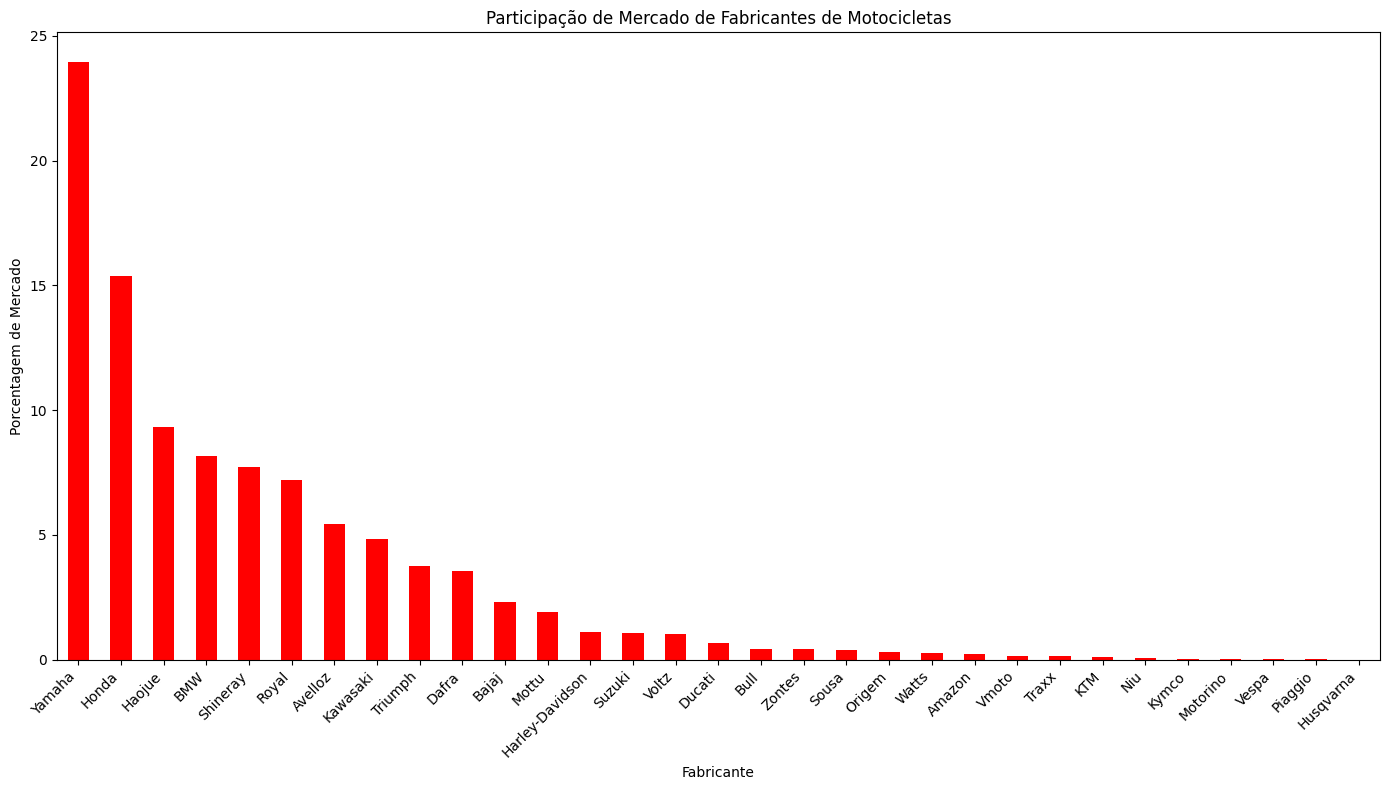

In [41]:
# Verificar a estrutura do DataFrame e converter colunas de vendas para numérico
df.loc[:, 'Jan':'Dez'] = df.loc[:, 'Jan':'Dez'].apply(pd.to_numeric, errors='coerce')

# Filtrando os Dados de Vendas
total_vendas = df.loc[:, 'Jan':'Dez'].sum(axis=1)

# Filtrando os Dados dos Veículos
posicao_veiculo = df[['Veículo', 'Pos.']]

# Combinando os Dados de Vendas e Veículos
veiculos_vendidos = posicao_veiculo.copy()
veiculos_vendidos['Total Vendas'] = total_vendas

# Extraindo o nome do fabricante dos nomes dos veículos
veiculos_vendidos['Fabricante'] = veiculos_vendidos['Veículo'].str.split(n=1).str[0]

# Calculando o total de vendas por fabricante
vendas_por_fabricante = veiculos_vendidos.groupby('Fabricante')['Total Vendas'].sum().sort_values(ascending=False)

# Calculando a porcentagem de mercado de cada fabricante
porcentagem_mercado = (vendas_por_fabricante / vendas_por_fabricante.sum()) * 100

# Criar um gráfico de barras
plt.figure(figsize=(14, 8))
porcentagem_mercado.plot(kind='bar', color='red')
plt.title('Participação de Mercado de Fabricantes de Motocicletas')
plt.xlabel('Fabricante')
plt.ylabel('Porcentagem de Mercado')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 10_ Quais fabricantes têm uma presença mais significativa entre as dez motocicletas mais vendidas, considerando o número total de unidades vendidas de cada modelo?

In [45]:
# Encontrando as dez motocicletas mais vendidas

dez_mais_vendidas = veiculos_vendidos.nlargest(10, 'Total Vendas')

# Extraindo o nome do fabricante dos nomes dos veículos das dez mais vendidas

dez_mais_vendidas['Fabricante'] = dez_mais_vendidas['Veículo'].str.split(n=1).str[0]

# Contando a frequência de cada fabricante entre as dez motocicletas mais vendidas

fabricantes_contagem = dez_mais_vendidas['Fabricante'].value_counts()

print(fabricantes_contagem)

Yamaha      4
Honda       2
Avelloz     1
BMW         1
Shineray    1
Royal       1
Name: Fabricante, dtype: int64


In [43]:
print('Os Fabricantes mais proeminentes são Honda e Yamaha')

Os Fabricantes mais proeminentes são Honda e Yamaha


### Insights

Tendo como base as análises realizadas, as empresas do setor de motocicletas devem prestar atenção aos padrões sazonais de vendas identificados. Por exemplo, saber qual mês do primeiro semestre teve o maior número de vendas pode indicar uma tendência sazonal que pode ser explorada com campanhas de marketing direcionadas ou promoções. Da mesma forma, identificar os meses com menor número de vendas pode ajudar as empresas a entender períodos de menor demanda, permitindo ajustes estratégicos no estoque e na alocação de recursos.

##### Analisando os Resultados

* Meses de Maior Desempenho:

Meses com maiores vendas, como por exemplo, janeiro no primeiro semestre e julho no segundo semestre, podem ser períodos onde há uma maior demanda sazonal. As empresas podem explorar essas oportunidades lançando novos modelos ou promovendo ofertas especiais para maximizar os lucros.

* Meses de Menor Desempenho:

Meses com menor número de vendas, como junho e dezembro, podem indicar períodos de menor procura. Isso pode ser devido a vários fatores, como clima, feriados ou outros eventos sazonais. Identificar essas tendências permite que as empresas planejem melhor suas estratégias de marketing e estoque.

* Distribuição de Vendas e Participação de Mercado:

A análise de distribuição de vendas entre os fabricantes mais populares fornece insights sobre a competitividade no mercado. Fabricantes com maior participação de mercado podem estar dominando devido a fatores como qualidade do produto, preço competitivo ou marca forte.

* Presença de Fabricantes nas Top 10 Vendas:

Entender quais fabricantes têm uma presença mais significativa entre as motos mais vendidas pode indicar quais marcas estão capturando mais o interesse dos consumidores. Isso pode guiar decisões sobre parcerias, desenvolvimento de produtos e estratégias de marketing.

Contudo, ao compreender e agir com base nesses padrões de vendas ao longo do ano, as empresas de motocicletas podem melhorar seu desempenho, satisfazer as necessidades dos clientes e manter uma vantagem competitiva no mercado. Além disso, a análise detalhada dos dados de vendas pode ajudar as empresas a tomar decisões informadas sobre produção, estoque e campanhas promocionais, maximizando assim sua eficiência operacional e potencial de lucro.